In [1]:
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np

In [2]:
%run -i ../notebooks/functions.py

In [3]:
master_df = pd.read_csv('../processed_data/master.csv')

In [4]:
X = master_df[['NTA_lat', 'NTA_long']]
max_k = 10

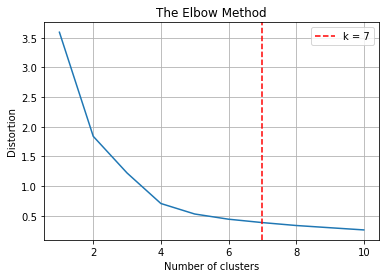

In [5]:
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
        model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100)
        model.fit(X)
        distortions.append(model.inertia_)

k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [6]:
k = 5
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = master_df[["NTA_lat","NTA_long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

## add clustering info to the original dataset
master_df[["cluster"]] = dtf_X[["cluster"]]

In [7]:
df0 = master_df.loc[master_df['cluster'] == 0]
df1 = master_df.loc[master_df['cluster'] == 1]
df2 = master_df.loc[master_df['cluster'] == 2]
df3 = master_df.loc[master_df['cluster'] == 3]
df4 = master_df.loc[master_df['cluster'] == 4]

In [8]:
cluster_dfs = llz_set([df0,df1,df2,df3,df4])

/home/brian/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


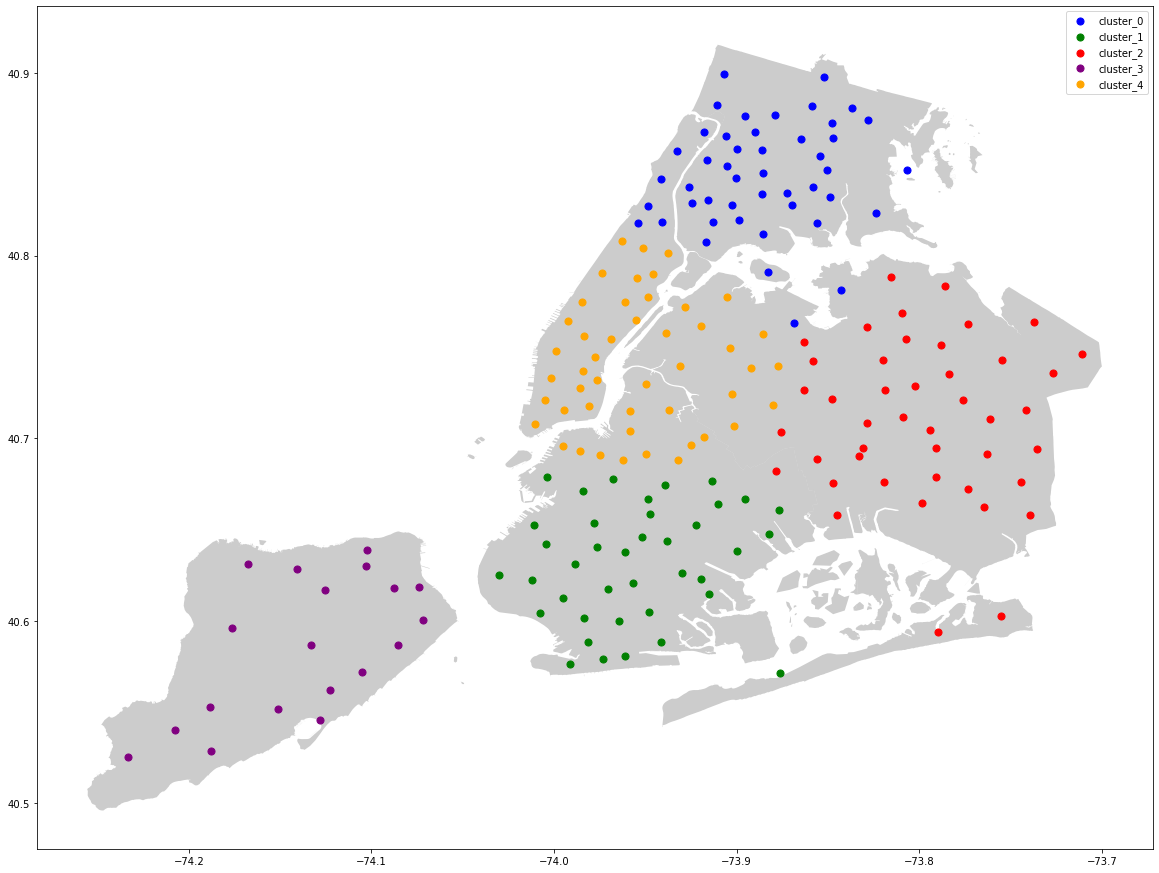

In [11]:
 # Import NYC Neighborhood Shape Files
fig,ax=plt.subplots(figsize=(20,20))
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boroughs.plot(ax=ax,alpha=0.4,color="grey")

cluster_dfs[0].plot(ax = ax, markersize = 50, color = 'blue', marker = 'o', label = 'cluster_0')
cluster_dfs[1].plot(ax = ax, markersize = 50, color = 'green', marker = 'o', label = 'cluster_1')
cluster_dfs[2].plot(ax = ax, markersize = 50, color = 'red', marker = 'o', label = 'cluster_2')
cluster_dfs[3].plot(ax = ax, markersize = 50, color = 'purple', marker = 'o', label = 'cluster_3')
cluster_dfs[4].plot(ax = ax, markersize = 50, color = 'orange', marker = 'o', label = 'cluster_4')

plt.legend()